In [7]:
import pandas as pd
import numpy as np

# Ganti 'customer_data.csv' dengan path file Anda jika berbeda
file_path = '../Datasets/customer_data.csv'

try:
    # Memuat data dari file CSV ke dalam DataFrame
    df = pd.read_csv(file_path)

    # Menampilkan 10 baris pertama
    print("--- 10 Baris Pertama Data ---")
    print(df.head(10))
    print("\n" + "="*50 + "\n")

    # Menampilkan informasi ringkas DataFrame (tipe data, non-null counts)
    print("--- Informasi DataFrame (df.info()) ---")
    df.info()
    print("\n" + "="*50 + "\n")

    # Menampilkan dimensi DataFrame
    print(f"--- Dimensi Data ---\nBentuk DataFrame: {df.shape}\n")
    print("="*50 + "\n")
    
    # Menampilkan statistik deskriptif untuk kolom numerik
    print("--- Statistik Deskriptif (Kolom Numerik) ---")
    print(df.describe())
    print("\n" + "="*50 + "\n")

    # Menampilkan statistik deskriptif untuk kolom non-numerik (kategorikal)
    print("--- Statistik Deskriptif (Kolom Kategorikal/Object) ---")
    print(df.describe(include=['object']))
    print("\n" + "="*50 + "\n")


except FileNotFoundError:
    print(f"Error: File di path '{file_path}' tidak ditemukan.")
except Exception as e:
    print(f"Terjadi error: {e}")

C:\Users\62857\AppData\Local\Temp\ipykernel_6112\3654692273.py:9: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


--- 10 Baris Pertama Data ---
       ID Customer_ID     Month             Name   Age          SSN  \
0  0x1602   CUS_0xd40   January    Aaron Maashoh    23  821-00-0265   
1  0x1603   CUS_0xd40  February    Aaron Maashoh    23  821-00-0265   
2  0x1604   CUS_0xd40     March    Aaron Maashoh  -500  821-00-0265   
3  0x1605   CUS_0xd40     April    Aaron Maashoh    23  821-00-0265   
4  0x1606   CUS_0xd40       May    Aaron Maashoh    23  821-00-0265   
5  0x1607   CUS_0xd40      June    Aaron Maashoh    23  821-00-0265   
6  0x1608   CUS_0xd40      July    Aaron Maashoh    23  821-00-0265   
7  0x1609   CUS_0xd40    August              NaN    23    #F%$D@*&8   
8  0x160e  CUS_0x21b1   January  Rick Rothackerj   28_  004-07-5839   
9  0x160f  CUS_0x21b1  February  Rick Rothackerj    28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0  Scientist      19114.12            1824.843333                  3  ...   
1  Scientist      19114.12        

In [8]:
# --- 2.1. Standarisasi Nilai Kosong ---
# Ganti semua format placeholder/kotor dengan NaN (Not a Number)
print("--- 2.1. Menstandarisasi Nilai Kosong ---")
special_chars = ['_______', '_', '!@9#%8', '#F%$D@*&8']
df.replace(special_chars, np.nan, inplace=True)
print("Placeholder khusus telah diganti dengan NaN.\n")

--- 2.1. Menstandarisasi Nilai Kosong ---
Placeholder khusus telah diganti dengan NaN.



In [9]:
# --- 2.2. Membersihkan dan Mengonversi Kolom yang Seharusnya Numerik ---
print("--- 2.2. Membersihkan dan Mengonversi Tipe Data ---")

# Daftar kolom yang akan dibersihkan dari karakter non-numerik dan dikonversi
# Kita kecualikan 'Credit_History_Age' karena butuh penanganan khusus
cols_to_clean_numeric = [
    'Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
    'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance'
]

for col in cols_to_clean_numeric:
    # Menggunakan regex untuk menghapus semua karakter kecuali angka, titik (desimal), dan tanda minus
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(r'[^\d.-]', '', regex=True)
    
    # Konversi ke numerik. errors='coerce' akan mengubah nilai yang gagal konversi menjadi NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    print(f"Kolom '{col}' telah dibersihkan dan dikonversi ke numerik.")

# Menangani nilai tidak valid secara spesifik
df['Age'] = df['Age'].apply(lambda x: x if (x is np.nan or 18 <= x <= 100) else np.nan)
print("Nilai 'Age' yang tidak valid (<18 atau >100) telah diubah menjadi NaN.\n")


--- 2.2. Membersihkan dan Mengonversi Tipe Data ---
Kolom 'Age' telah dibersihkan dan dikonversi ke numerik.
Kolom 'Annual_Income' telah dibersihkan dan dikonversi ke numerik.
Kolom 'Num_of_Loan' telah dibersihkan dan dikonversi ke numerik.
Kolom 'Num_of_Delayed_Payment' telah dibersihkan dan dikonversi ke numerik.
Kolom 'Changed_Credit_Limit' telah dibersihkan dan dikonversi ke numerik.
Kolom 'Outstanding_Debt' telah dibersihkan dan dikonversi ke numerik.
Kolom 'Amount_invested_monthly' telah dibersihkan dan dikonversi ke numerik.
Kolom 'Monthly_Balance' telah dibersihkan dan dikonversi ke numerik.
Nilai 'Age' yang tidak valid (<18 atau >100) telah diubah menjadi NaN.



In [11]:
import re

# --- 2.3. Penanganan Khusus untuk 'Credit_History_Age' ---
print("--- 2.3. Mengonversi 'Credit_History_Age' menjadi Bulan ---")

def convert_history_to_months(age_str):
    if pd.isna(age_str):
        return np.nan
    try:
        # Ekstrak angka tahun dan bulan menggunakan regex
        years = int(re.search(r'(\d+)\s+Years', age_str).group(1))
        months = int(re.search(r'(\d+)\s+Months', age_str).group(1))
        return (years * 12) + months
    except (AttributeError, TypeError):
        # Jika format tidak sesuai, kembalikan NaN
        return np.nan

df['Credit_History_Age_Months'] = df['Credit_History_Age'].apply(convert_history_to_months)
# Hapus kolom lama
df.drop('Credit_History_Age', axis=1, inplace=True)
print("Kolom 'Credit_History_Age' telah dikonversi menjadi 'Credit_History_Age_Months'.\n")




--- 2.3. Mengonversi 'Credit_History_Age' menjadi Bulan ---


Kolom 'Credit_History_Age' telah dikonversi menjadi 'Credit_History_Age_Months'.



In [12]:
# --- 2.4. Verifikasi Hasil Pembersihan ---
print("="*50)
print("--- VERIFIKASI SETELAH PEMBERSIHAN ---")
print("="*50 + "\n")

print("--- Informasi DataFrame Terbaru (df.info()) ---")
df.info()
print("\n" + "="*50 + "\n")

print("--- Jumlah Nilai Kosong (NaN) per Kolom (diurutkan) ---")
print(df.isnull().sum().sort_values(ascending=False))

--- VERIFIKASI SETELAH PEMBERSIHAN ---

--- Informasi DataFrame Terbaru (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         100000 non-null  object 
 1   Customer_ID                100000 non-null  object 
 2   Month                      100000 non-null  object 
 3   Name                       90015 non-null   object 
 4   Age                        91518 non-null   float64
 5   SSN                        94428 non-null   object 
 6   Occupation                 92938 non-null   object 
 7   Annual_Income              100000 non-null  float64
 8   Monthly_Inhand_Salary      84998 non-null   float64
 9   Num_Bank_Accounts          100000 non-null  int64  
 10  Num_Credit_Card            100000 non-null  int64  
 11  Interest_Rate              100000 non-null  int64  
 12 

In [13]:
# --- 3.1. Hapus Kolom Identifier (PII) ---
print("--- 3.1. Menghapus Kolom Identifier ---")
df.drop(columns=['ID', 'Customer_ID', 'Name', 'SSN'], inplace=True)
print("Kolom 'ID', 'Customer_ID', 'Name', dan 'SSN' telah dihapus.\n")

--- 3.1. Menghapus Kolom Identifier ---
Kolom 'ID', 'Customer_ID', 'Name', dan 'SSN' telah dihapus.



In [14]:
# --- 3.2. Imputasi Kolom Numerik dengan Median ---
print("--- 3.2. Mengisi Nilai Kosong pada Kolom Numerik (Median) ---")
# Pilih semua kolom numerik (float atau integer)
numeric_cols_with_nan = df.select_dtypes(include=np.number).columns[df.select_dtypes(include=np.number).isnull().any()].tolist()

for col in numeric_cols_with_nan:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)
    print(f"Nilai kosong di kolom '{col}' telah diisi dengan median ({median_value:.2f}).")


--- 3.2. Mengisi Nilai Kosong pada Kolom Numerik (Median) ---
Nilai kosong di kolom 'Age' telah diisi dengan median (34.00).
Nilai kosong di kolom 'Monthly_Inhand_Salary' telah diisi dengan median (3093.75).
Nilai kosong di kolom 'Num_of_Delayed_Payment' telah diisi dengan median (14.00).
Nilai kosong di kolom 'Changed_Credit_Limit' telah diisi dengan median (9.40).
Nilai kosong di kolom 'Num_Credit_Inquiries' telah diisi dengan median (6.00).
Nilai kosong di kolom 'Amount_invested_monthly' telah diisi dengan median (135.93).
Nilai kosong di kolom 'Monthly_Balance' telah diisi dengan median (336.45).
Nilai kosong di kolom 'Credit_History_Age_Months' telah diisi dengan median (219.00).


C:\Users\62857\AppData\Local\Temp\ipykernel_6112\38748898.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\62857\AppData\Local\Temp\ipykernel_6112\38748898.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [15]:
# --- 3.3. Imputasi Kolom Kategorikal dengan Modus ---
print("\n--- 3.3. Mengisi Nilai Kosong pada Kolom Kategorikal (Modus) ---")
# Pilih semua kolom object/kategorikal
categorical_cols_with_nan = df.select_dtypes(include='object').columns[df.select_dtypes(include='object').isnull().any()].tolist()

for col in categorical_cols_with_nan:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
    print(f"Nilai kosong di kolom '{col}' telah diisi dengan modus ('{mode_value}').")



--- 3.3. Mengisi Nilai Kosong pada Kolom Kategorikal (Modus) ---
Nilai kosong di kolom 'Occupation' telah diisi dengan modus ('Lawyer').
Nilai kosong di kolom 'Type_of_Loan' telah diisi dengan modus ('Not Specified').
Nilai kosong di kolom 'Credit_Mix' telah diisi dengan modus ('Standard').
Nilai kosong di kolom 'Payment_Behaviour' telah diisi dengan modus ('Low_spent_Small_value_payments').


C:\Users\62857\AppData\Local\Temp\ipykernel_6112\1833233486.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [16]:

# --- 3.4. Verifikasi Akhir ---
print("\n" + "="*50)
print("--- VERIFIKASI SETELAH IMPUTASI ---")
print("="*50 + "\n")

print("--- Jumlah Nilai Kosong (NaN) per Kolom ---")
# Jika berhasil, output di bawah ini seharusnya menunjukkan 0 untuk semua kolom
print(df.isnull().sum())

print("\n--- Informasi DataFrame Final ---")
df.info()


--- VERIFIKASI SETELAH IMPUTASI ---

--- Jumlah Nilai Kosong (NaN) per Kolom ---
Month                        0
Age                          0
Occupation                   0
Annual_Income                0
Monthly_Inhand_Salary        0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Type_of_Loan                 0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly      0
Payment_Behaviour            0
Monthly_Balance              0
Credit_Score                 0
Credit_History_Age_Months    0
dtype: int64

--- Informasi DataFrame Final ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column     

In [17]:
df.to_csv('../Datasets/cleaned_customer_data.csv', index=False)

### Next Step ✨
1. Analisis Sebaran Data dan Outlier
2. Analisis Hubungan (Relationship Analysis)

--- 4.1. Menganalisis Sebaran dan Outlier ---


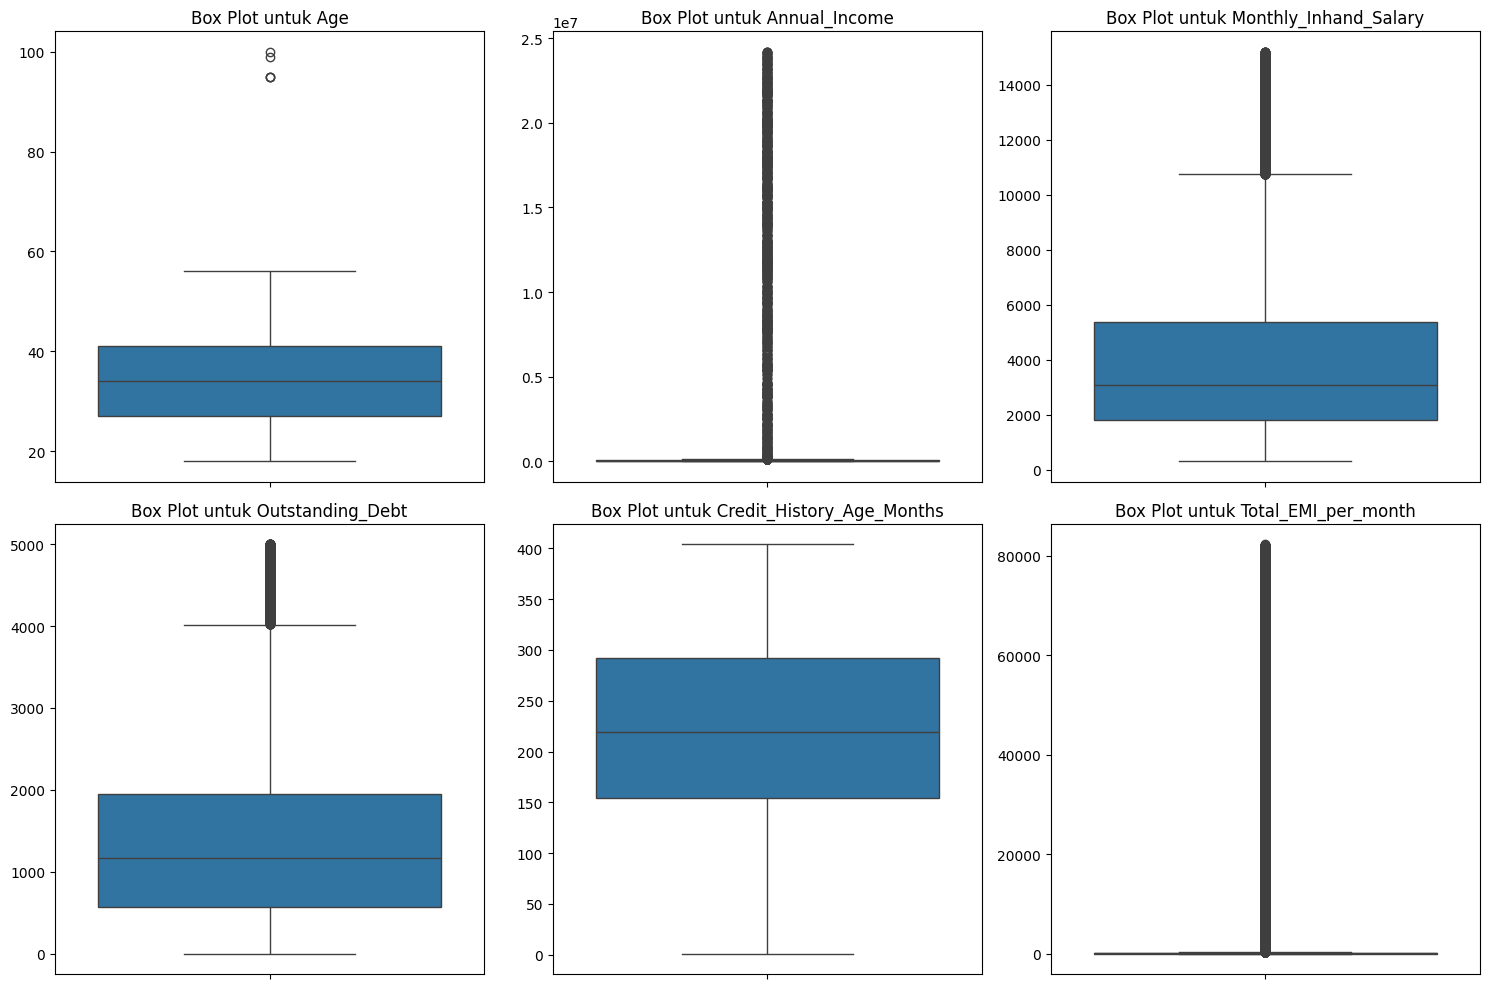


Statistik Deskriptif Setelah Pembersihan:
                 Age  Annual_Income  Monthly_Inhand_Salary  Outstanding_Debt  \
count  100000.000000   1.000000e+05          100000.000000     100000.000000   
mean       34.393360   1.764157e+05            4029.084964       1426.220376   
std         9.685699   1.429618e+06            2961.363540       1155.129026   
min        18.000000   7.005930e+03             303.645417          0.230000   
25%        27.000000   1.945750e+04            1792.084167        566.072500   
50%        34.000000   3.757861e+04            3093.745000       1166.155000   
75%        41.000000   7.279092e+04            5371.525000       1945.962500   
max       100.000000   2.419806e+07           15204.633333       4998.070000   

       Credit_History_Age_Months  Total_EMI_per_month  
count              100000.000000        100000.000000  
mean                  220.997160          1403.118217  
std                    95.133546          8306.041270  
min         

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# --- 4.1. Analisis Sebaran dan Outlier untuk Kolom Numerik Penting ---
print("--- 4.1. Menganalisis Sebaran dan Outlier ---")

numeric_cols_to_analyze = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt',
    'Credit_History_Age_Months', 'Total_EMI_per_month'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols_to_analyze, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot untuk {col}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

print("\nStatistik Deskriptif Setelah Pembersihan:")
print(df[numeric_cols_to_analyze].describe())


### Highlight Data : 

1. Usia & Riwayat Kredit: Kebanyakan normal, ada beberapa yang ekstrem.
2. Pendapatan, Gaji, Utang, & Cicilan Bulanan: Mayoritas nilai rendah, tapi banyak yang punya nilai sangat tinggi (ekstrem).

In [21]:
# --- 5.1. Terapkan Transformasi Logaritmik ---
# Kita gunakan np.log1p yang menghitung log(1+x). Ini aman untuk nilai 0.

print("--- 5.1. Menerapkan Transformasi Logaritmik ---")
df['Annual_Income_log'] = np.log1p(df['Annual_Income'])
df['Total_EMI_per_month_log'] = np.log1p(df['Total_EMI_per_month'])
print("Kolom 'Annual_Income_log' dan 'Total_EMI_per_month_log' telah dibuat.\n")



--- 5.1. Menerapkan Transformasi Logaritmik ---
Kolom 'Annual_Income_log' dan 'Total_EMI_per_month_log' telah dibuat.



--- 5.2. Membandingkan Distribusi Sebelum dan Sesudah Transformasi Log ---


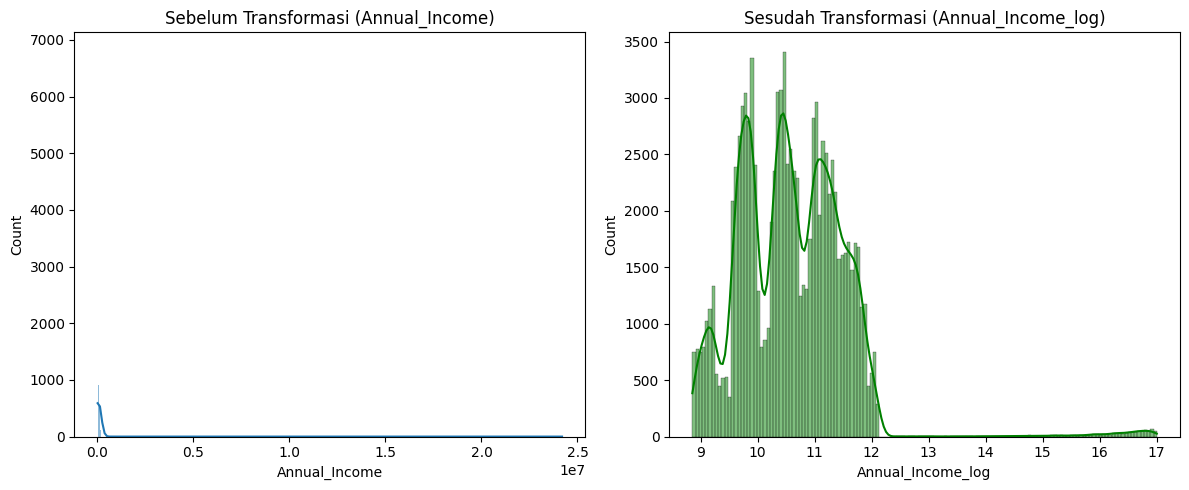

In [22]:
# --- 5.2. Visualisasi Perbandingan: Sebelum vs Sesudah Transformasi ---
print("--- 5.2. Membandingkan Distribusi Sebelum dan Sesudah Transformasi Log ---")

# Membuat visualisasi untuk Annual_Income
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Annual_Income'], kde=True)
plt.title('Sebelum Transformasi (Annual_Income)')

plt.subplot(1, 2, 2)
sns.histplot(df['Annual_Income_log'], kde=True, color='green')
plt.title('Sesudah Transformasi (Annual_Income_log)')
plt.tight_layout()
plt.show()

1. Sebelum: Pendapatan sangat miring ke kanan, banyak yang rendah, sedikit yang sangat tinggi.
2. Sesudah: Setelah transformasi log, pendapatan jadi lebih menyebar dan simetris.

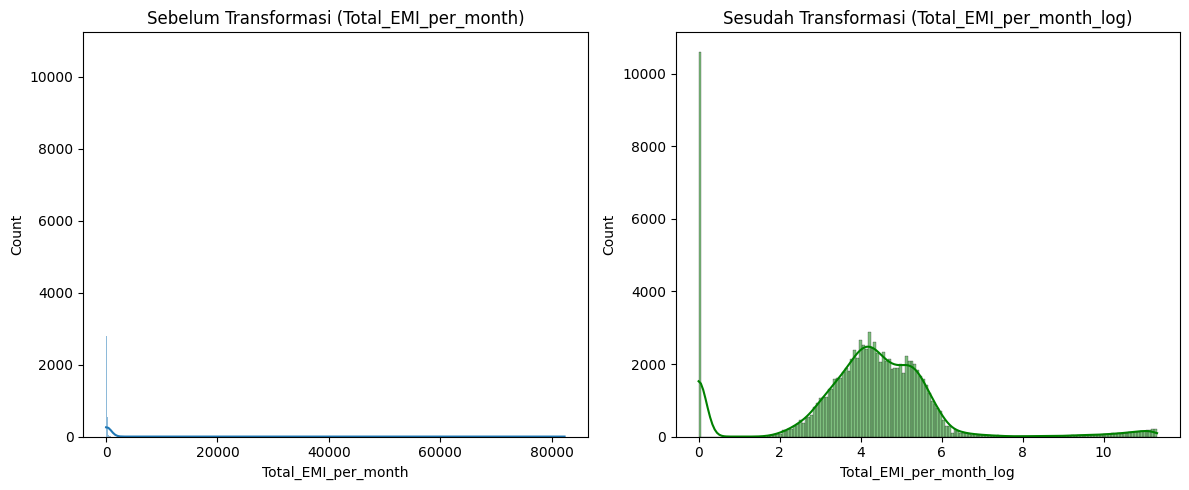

In [23]:
# Membuat visualisasi untuk Total_EMI_per_month
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Total_EMI_per_month'], kde=True)
plt.title('Sebelum Transformasi (Total_EMI_per_month)')

plt.subplot(1, 2, 2)
sns.histplot(df['Total_EMI_per_month_log'], kde=True, color='green')
plt.title('Sesudah Transformasi (Total_EMI_per_month_log)')
plt.tight_layout()
plt.show()

1. Sebelum: Cicilan sangat padat di nol, sedikit yang tinggi karena outlier terlalu besar jadi data sulit dibaca
2. Sesudah: Transformasi log menyebarkan, tapi tetap ada dua kelompok nilai (karena banyak nol awal).

==============================================================================================================================


## Key Insight 👁️✨

In [ ]:
df.to_csv('../Datasets/cleaned_customer_data_final.csv', index=False)

C:\Users\62857\AppData\Local\Temp\ipykernel_6112\3003127482.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Credit_Score', order=['Poor', 'Standard', 'Good'], palette="Set2")


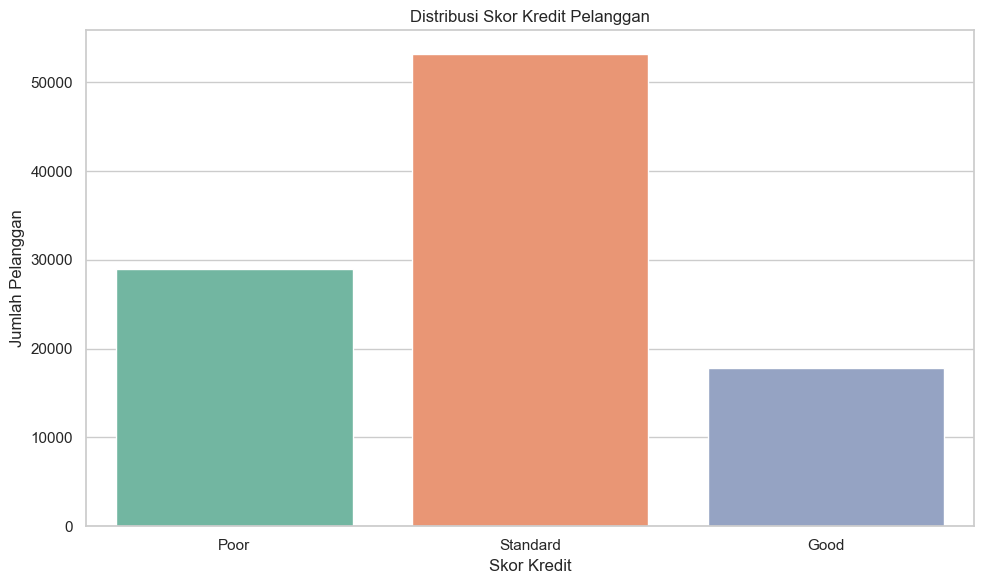

C:\Users\62857\AppData\Local\Temp\ipykernel_6112\3003127482.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=utilization_by_score.index, y=utilization_by_score.values, palette="Set1")


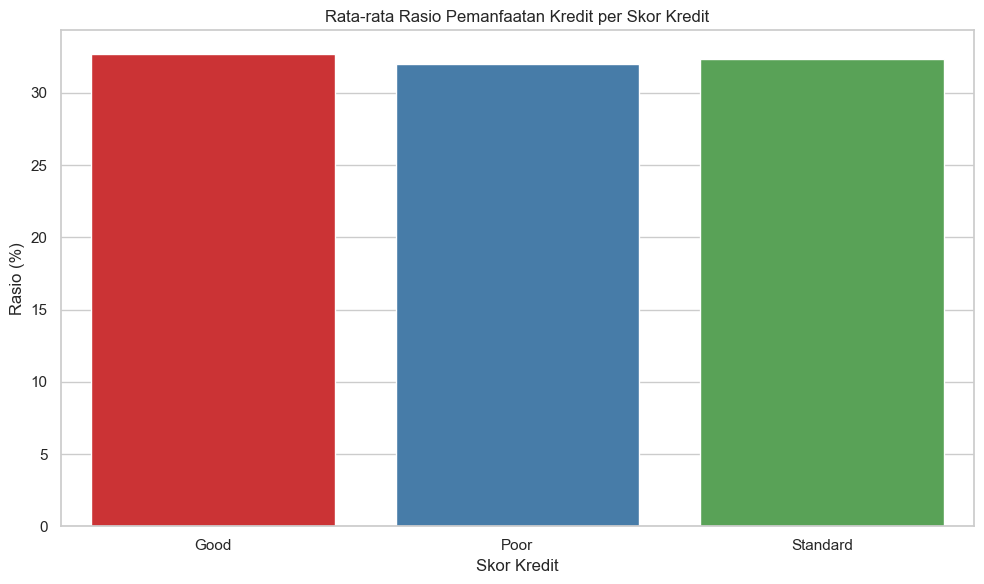

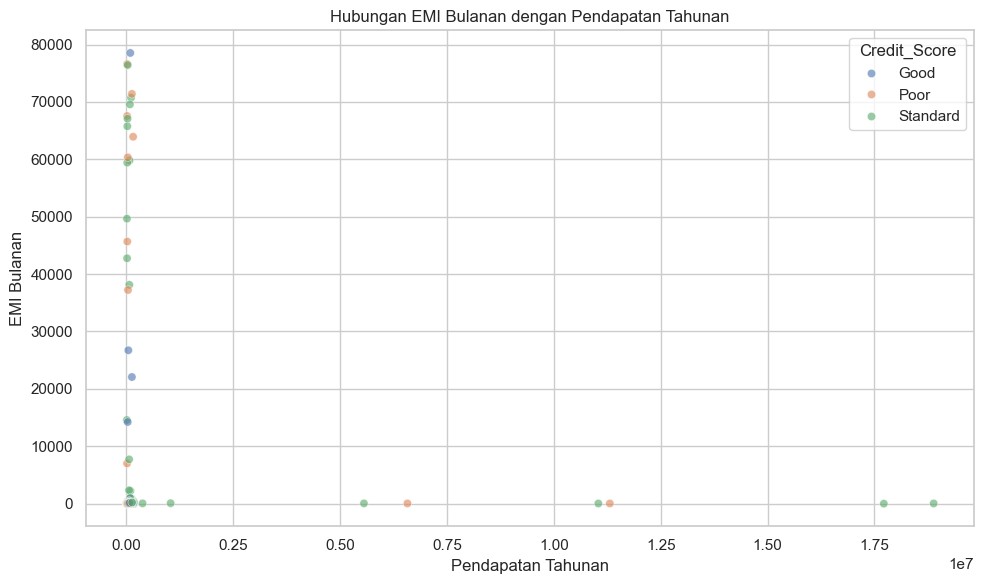

C:\Users\62857\AppData\Local\Temp\ipykernel_6112\3003127482.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Credit_Score", y="Num_of_Delayed_Payment", palette="Set3")


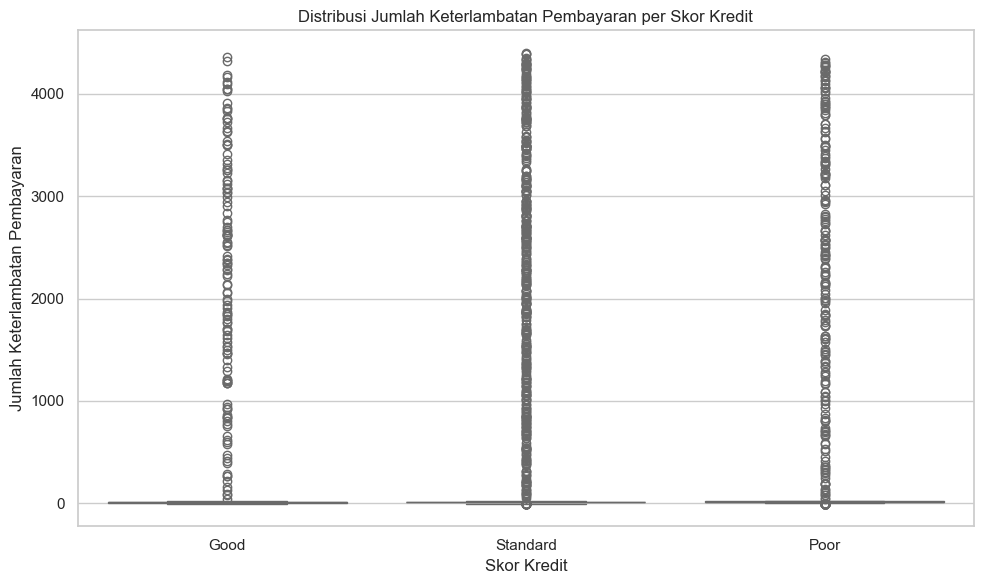

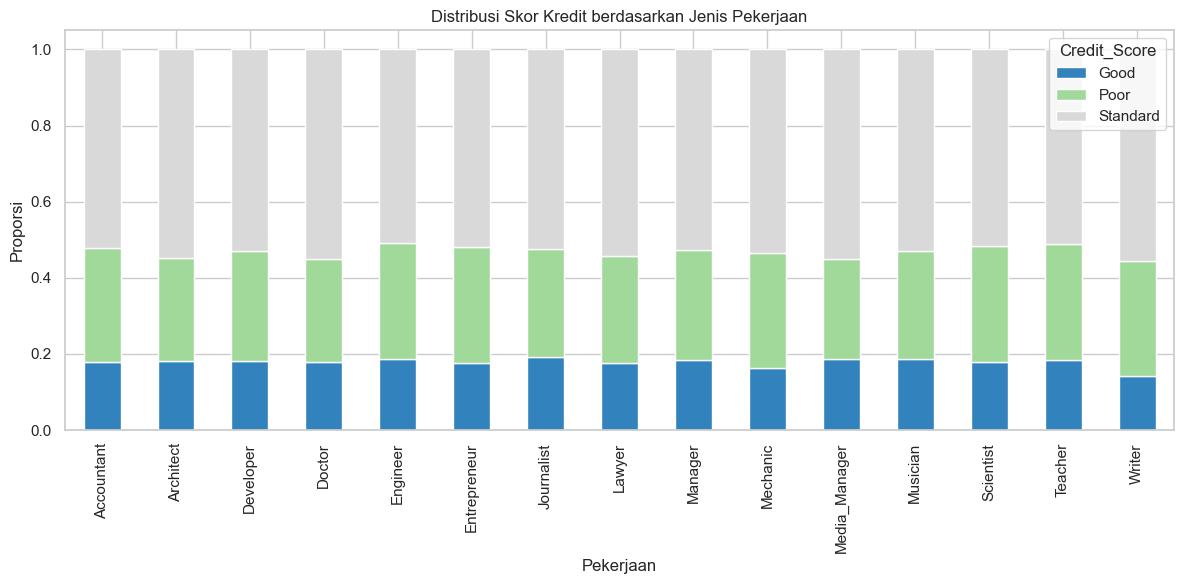

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("../Datasets/cleaned_customer_data_final.csv")

# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Visualisasi 1: Distribusi Skor Kredit
sns.countplot(data=df, x='Credit_Score', order=['Poor', 'Standard', 'Good'], palette="Set2")
plt.title("Distribusi Skor Kredit Pelanggan")
plt.xlabel("Skor Kredit")
plt.ylabel("Jumlah Pelanggan")
plt.tight_layout()
plt.savefig("../images/insight1_skor_kredit.png")
plt.show()

# Visualisasi 2: Rata-rata Rasio Pemanfaatan Kredit per Skor Kredit
utilization_by_score = df.groupby('Credit_Score')['Credit_Utilization_Ratio'].mean()
sns.barplot(x=utilization_by_score.index, y=utilization_by_score.values, palette="Set1")
plt.title("Rata-rata Rasio Pemanfaatan Kredit per Skor Kredit")
plt.ylabel("Rasio (%)")
plt.xlabel("Skor Kredit")
plt.tight_layout()
plt.savefig("../images/insight2_utilisasi_kredit.png")
plt.show()

# Visualisasi 3: EMI vs Pendapatan Tahunan
sns.scatterplot(data=df.sample(1000, random_state=42), x="Annual_Income", y="Total_EMI_per_month", hue="Credit_Score", alpha=0.6)
plt.title("Hubungan EMI Bulanan dengan Pendapatan Tahunan")
plt.xlabel("Pendapatan Tahunan")
plt.ylabel("EMI Bulanan")
plt.tight_layout()
plt.savefig("../images/insight3_emi_vs_income.png")
plt.show()

# Visualisasi 4: Jumlah Keterlambatan Pembayaran per Skor Kredit
sns.boxplot(data=df, x="Credit_Score", y="Num_of_Delayed_Payment", palette="Set3")
plt.title("Distribusi Jumlah Keterlambatan Pembayaran per Skor Kredit")
plt.xlabel("Skor Kredit")
plt.ylabel("Jumlah Keterlambatan Pembayaran")
plt.tight_layout()
plt.savefig("../images/insight4_delay_vs_score.png")
plt.show()

# Visualisasi 5: Distribusi Skor Kredit berdasarkan Pekerjaan
occupation_score = df.groupby("Occupation")["Credit_Score"].value_counts(normalize=True).unstack().fillna(0)
occupation_score.plot(kind="bar", stacked=True, colormap="tab20c", figsize=(12, 6))
plt.title("Distribusi Skor Kredit berdasarkan Jenis Pekerjaan")
plt.ylabel("Proporsi")
plt.xlabel("Pekerjaan")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("../images/insight5_score_per_occupation.png")
plt.show()

